# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [4]:
data = pd.DataFrame(cities, columns=['City'])
data

,City
0,chokurdakh
1,arraial do cabo
2,amderma
3,mar del plata
4,carnarvon
...,...
595,ubon ratchathani
596,ampanihy
597,aksu
598,henties bay


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
data['Lat'] = ''
data['Lng'] = ''
data['Max Temp'] = ''
data['Humidity'] = ''
data['Cloudiness'] = ''
data['Wind Speed'] = ''
data['Country'] = ''
data['Date'] = ''

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print('Begin Data Retrieval')
print('------------------------')

for index, row in data.iterrows():
    try:
        print(f'Processing City {index+1}: {row.City}')
        response = requests.get(query_url + row.City).json()
        data.loc[index, 'Lat'] = response['coord']['lat']
        data.loc[index, 'Lng'] = response['coord']['lon']
        data.loc[index, 'Max Temp'] = response['main']['temp_max']
        data.loc[index, 'Humidity'] = response['main']['humidity']
        data.loc[index, 'Cloudiness'] = response['clouds']['all']
        data.loc[index, 'Wind Speed'] = response['wind']['speed']
        data.loc[index, 'Country'] = response['sys']['country']
        data.loc[index, 'Date'] = response['dt']
    except:
        print('City not found. Skipping...')
        
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Begin Data Retrieval
------------------------
Processing City 1: chokurdakh
Processing City 2: arraial do cabo
Processing City 3: amderma
City not found. Skipping...
Processing City 4: mar del plata
Processing City 5: carnarvon
Processing City 6: sabha
Processing City 7: hobart
Processing City 8: lebu
Processing City 9: hendek
Processing City 10: pontianak
Processing City 11: rikitea
Processing City 12: dikson
Processing City 13: butaritari
Processing City 14: saleaula
City not found. Skipping...
Processing City 15: ushuaia
Processing City 16: dawlatabad
Processing City 17: upernavik
Processing City 18: vaini
Processing City 19: baruun-urt
Processing City 20: tuatapere
Processing City 21: albany
Processing City 22: mataura
Processing City 23: makakilo city
Processing City 24: pisco
Processing City 25: bluff
Processing City 26: moirang
Processing City 27: yellowknife
Processing City 28: busselton
Processing City 29: bengkulu
Processing City 30: marica
Processing City 31: bredasdorp
Proc

Processing City 252: los llanos de aridane
Processing City 253: port augusta
Processing City 254: normandin
Processing City 255: grand river south east
City not found. Skipping...
Processing City 256: laishevo
Processing City 257: san patricio
Processing City 258: chapleau
Processing City 259: saint-pierre
Processing City 260: cairns
Processing City 261: coos bay
Processing City 262: presque isle
Processing City 263: talnakh
Processing City 264: vaitupu
City not found. Skipping...
Processing City 265: ukiah
Processing City 266: chimbote
Processing City 267: provideniya
Processing City 268: nabire
Processing City 269: heilbron
Processing City 270: paciran
Processing City 271: mount gambier
Processing City 272: kaitangata
Processing City 273: grand gaube
Processing City 274: plotnikovo
Processing City 275: ostrovnoy
Processing City 276: staryy nadym
Processing City 277: luderitz
Processing City 278: turukhansk
Processing City 279: taoudenni
Processing City 280: bacolod
Processing City 28

Processing City 507: saldanha
Processing City 508: luwuk
Processing City 509: brewster
Processing City 510: nakamura
Processing City 511: santa maria da vitoria
Processing City 512: liverpool
Processing City 513: maloy
Processing City 514: skvyra
Processing City 515: nuuk
Processing City 516: port hedland
Processing City 517: tazovskiy
Processing City 518: maykain
City not found. Skipping...
Processing City 519: kamenskoye
City not found. Skipping...
Processing City 520: central point
Processing City 521: khash
Processing City 522: vredendal
Processing City 523: manono
Processing City 524: obo
Processing City 525: rio grande
Processing City 526: caravelas
Processing City 527: cabo san lucas
Processing City 528: cartagena del chaira
Processing City 529: chaa-khol
City not found. Skipping...
Processing City 530: valentin gomez farias
Processing City 531: toguchin
Processing City 532: kidal
Processing City 533: camocim
Processing City 534: anadyr
Processing City 535: blagoyevo
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
data.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [13]:
# remove empty rows
dataclean = data[data.Lat != '']
dataclean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.917,-24.2,80,0,8.48,RU,1616138774
1,arraial do cabo,-22.9661,-42.0278,75.58,88,4,16.08,BR,1616138474
3,mar del plata,-38.0023,-57.5575,54,100,0,3.44,AR,1616138774
4,carnarvon,-24.8667,113.633,91.4,33,0,13.8,AU,1616138775
5,sabha,27.0377,14.4283,73.31,16,0,14.54,LY,1616138775
...,...,...,...,...,...,...,...,...,...
593,vilyuysk,63.7553,121.625,22.62,90,100,10.85,RU,1616139008
595,ubon ratchathani,15.1667,105.167,100,49,0,5.75,TH,1616139009
596,ampanihy,-24.7,44.75,91.58,39,0,6.58,MG,1616139009
597,aksu,41.1231,80.2644,49.39,28,26,7.96,CN,1616139009


In [10]:
dataclean.to_csv('../output_data_HL/cities_HL.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
dataclean[dataclean.Humidity > 100]

# My dataclean dataset does not have a city with humidity > 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### My dataclean dataset does not have a city with humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

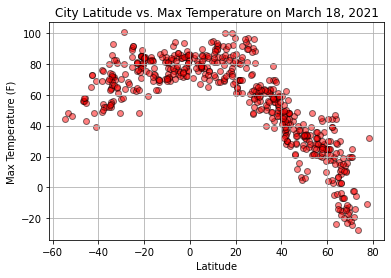

In [151]:
plt.scatter(dataclean.Lat, dataclean['Max Temp'], facecolor='red', edgecolor='black', alpha=0.5)
plt.grid()
plt.title('City Latitude vs. Max Temperature on March 18, 2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data_HL/LatitudeVsMaxTemp.png')

The further north from the equator, the lower the temperature. It drops down to the negatives. However, the further south from the equator, the temperature is bearable with a low close to 40 deg F.

## Latitude vs. Humidity Plot

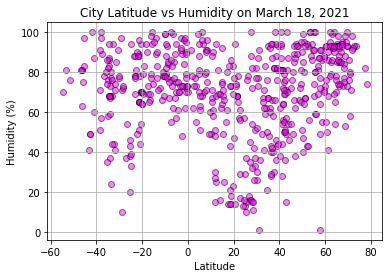

In [152]:
plt.scatter(dataclean.Lat, dataclean.Humidity, fc='magenta', ec='black', alpha=0.5)
plt.grid()
plt.title('City Latitude vs Humidity on March 18, 2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data_HL/LatitudeVsHumidity.png')

Humidity can be low at 20 to 30 +- latitude from the equator. It is generally high everywhere else.

## Latitude vs. Cloudiness Plot

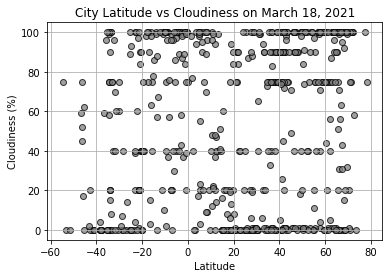

In [153]:
plt.scatter(dataclean.Lat, dataclean.Cloudiness, fc='gray', ec='black', alpha=0.75)
plt.grid()
plt.title('City Latitude vs Cloudiness on March 18, 2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data_HL/LatitudeVsCloudiness.png')

There is a no relationship between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

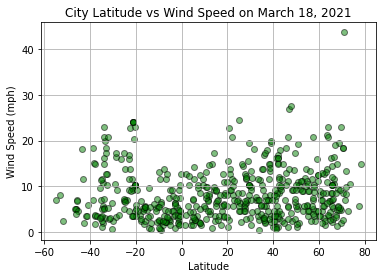

In [154]:
plt.scatter(dataclean.Lat, dataclean['Wind Speed'], fc='green', ec='black', alpha=0.5)
plt.grid()
plt.title('City Latitude vs Wind Speed on March 18, 2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data_HL/LatitudeVsWindSpeed.png')

Wind speed is mainly below 20 mph with one city in the Northern Hemisphere experiencing a high (>40 mph) speed.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [155]:
# filter for cities above the equator (latitude = 0)
northernhem = dataclean[dataclean.Lat >= 0] 
northernhem[:3]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.917,-24.2,80,0,8.48,RU,1616138774
5,sabha,27.0377,14.4283,73.31,16,0,14.54,LY,1616138775
8,hendek,40.7994,30.7481,44.6,93,90,1.14,TR,1616138777


y = -1.34x +99.53
The r-value is: 0.8094846712453796


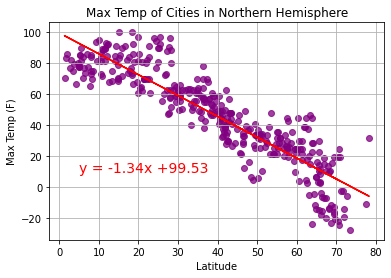

In [169]:
# Perform a linear regression on temperature vs. latitude
x_values = northernhem.Lat
y_values = northernhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='purple', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max Temp of Cities in Northern Hemisphere')

plt.annotate(line_eq,(5,10),fontsize=14,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/NorthernHemTemp.png')

There is a negative correlation between latitude and temperature because the further north, the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [157]:
southernhem = dataclean[dataclean.Lat < 0]
southernhem[:3]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,arraial do cabo,-22.9661,-42.0278,75.58,88,4,16.08,BR,1616138474
3,mar del plata,-38.0023,-57.5575,54,100,0,3.44,AR,1616138774
4,carnarvon,-24.8667,113.633,91.4,33,0,13.8,AU,1616138775


y = 0.51x +84.3
The r-value is: 0.3548200309117642


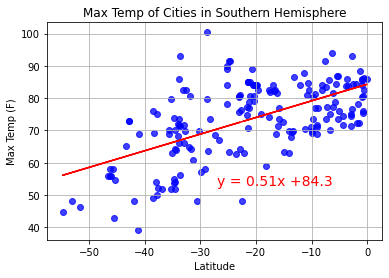

In [168]:

# Perform a linear regression on temperature vs. latitude
x_values = southernhem.Lat
y_values = southernhem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='blue', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(-27,53),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Max Temp of Cities in Southern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/SouthernHemTemp.png')

There is a positive correlation; as the latitude gets closer to the equator, the warmer the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x +52.99
The r-value is: 0.1103904130007329


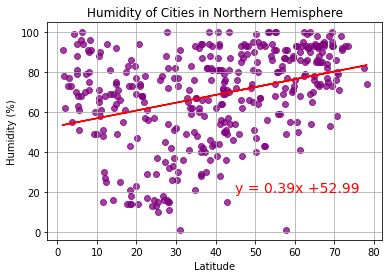

In [170]:
# Perform a linear regression on humidity vs. latitude
x_values = northernhem.Lat
y_values = northernhem.Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='purple', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(45,20),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities in Northern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/NorthernHumidity.png')

Humidity is generally high for most cities, while at around 10-30 deg latitude the humidity is low.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.24x +79.38
The r-value is: 0.03811456560529759


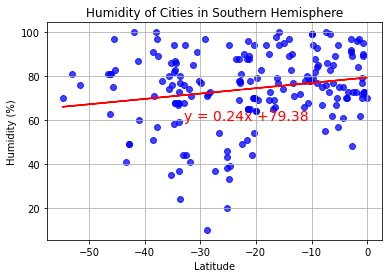

In [171]:
# Perform a linear regression on humidity vs. latitude
x_values = southernhem.Lat
y_values = southernhem.Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='blue', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(-33,60),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity of Cities in Southern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/SouthernHumidity.png')

Humidity is generally high, but near -30 deg latitude the humidity is low.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.33x +38.99
The r-value is: 0.025921710589648136


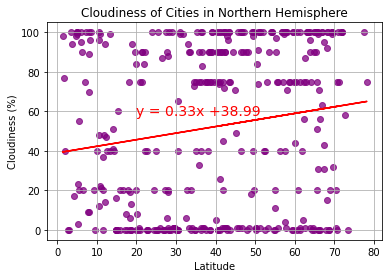

In [172]:
# Perform a linear regression on cloudiness vs. latitude
x_values = northernhem.Lat
y_values = northernhem.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='purple', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(20,58),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Cities in Northern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/NorthernCloudiness.png')

There is no relationship between latitude and cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.33x +80.24
The r-value is: 0.2082783537942234


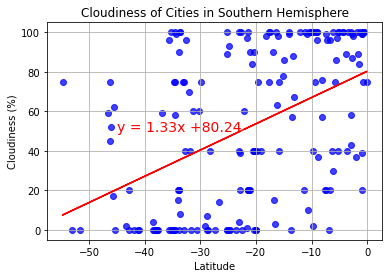

In [173]:
# Perform a linear regression on cloudiness vs. latitude
x_values = southernhem.Lat
y_values = southernhem.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='blue', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(-45,50),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness of Cities in Southern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/SouthernCloudiness.png')

There are more clouds as the latitude gets nearer the equator. Little clouds south of the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x +6.89
The r-value is: 0.019626455828565266


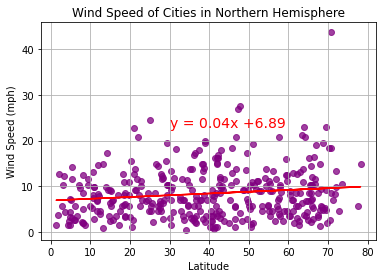

In [174]:
# Perform a linear regression on wind speed vs. latitude
x_values = northernhem.Lat
y_values = northernhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='purple', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(30,23),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed of Cities in Northern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/NorthernWindSpeed.png')

Wind speed is generally low with one city up North having high windspeed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.09x +5.52
The r-value is: 0.04808277819515432


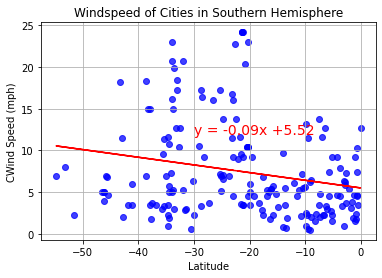

In [175]:
# Perform a linear regression on wind speed vs. latitude
x_values = southernhem.Lat
y_values = southernhem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values, facecolor='blue', alpha=.75)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.annotate(line_eq,(-30,12),fontsize=14,color="red")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('CWind Speed (mph)')
plt.title('Windspeed of Cities in Southern Hemisphere')

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig('../output_data_HL/SouthernWindSpeed.png')

Wind speed increases around -20 to -35 deg latitude.